In [116]:
import pandas as pd
import numpy as np

#EDA
from pandas_profiling import ProfileReport

#Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics

#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('file_2_ken.csv')
print(' \n Shape of the data: ', df.shape ,'\n')
df.head(5)

 
 Shape of the data:  (11010, 13) 



tenure month  loan fee        loan  mobile transactions  \
0             5       4.7  10680.0000                    0   
1            21       9.6   9120.0000                   13   
2            28      10.9  57900.0000                    0   
3             2       4.7   1090.0222                    0   
4            21       9.6  71250.0000                   34   

   mobile transactions value  mobile services  app users  TOTAL_INFLOW  \
0                        0.0                0          0             0   
1                  2922000.0                3          0       3000000   
2                        0.0                0          0             0   
3                        0.0                0          0        281400   
4                   502000.0                6          0       1548399   

   SALARY_STATUS  TOTAL_OUTFLOW  age gender is_default  
0              0              0   25      M          Y  
1              0        2994764   36      M          N  
2              0         502900   25      M          Y  
3              1         148931   32      F          Y  
4              1        1265621   32      F          N

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11010 entries, 0 to 11009
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tenure month               11010 non-null  int64  
 1   loan fee                   11010 non-null  float64
 2   loan                       11010 non-null  float64
 3   mobile transactions        11010 non-null  int64  
 4   mobile transactions value  11010 non-null  float64
 5   mobile services            11010 non-null  int64  
 6   app users                  11010 non-null  int64  
 7   TOTAL_INFLOW               11010 non-null  int64  
 8   SALARY_STATUS              11010 non-null  int64  
 9   TOTAL_OUTFLOW              11010 non-null  int64  
 10  age                        11010 non-null  int64  
 11  gender                     11010 non-null  object 
 12  is_default                 11010 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usag

**No null values**

In [52]:
df.describe(include='all')

tenure month      loan fee           loan  mobile transactions  \
count   11010.000000  11010.000000   11010.000000         11010.000000   
unique           NaN           NaN            NaN                  NaN   
top              NaN           NaN            NaN                  NaN   
freq             NaN           NaN            NaN                  NaN   
mean       15.729155      8.025322   37849.744046            14.410173   
std         9.927827      2.608142   38679.347156            20.581001   
min         0.000000      2.100000       4.442900             0.000000   
25%         5.000000      4.700000   11140.000000             3.000000   
50%        21.000000      9.600000   22800.000000             8.000000   
75%        21.000000      9.600000   57900.000000            17.000000   
max        28.000000     10.900000  478950.000000           304.000000   

        mobile transactions value  mobile services     app users  \
count                1.101000e+04     11010.000000  11010.000000   
unique                        NaN              NaN           NaN   
top                           NaN              NaN           NaN   
freq                          NaN              NaN           NaN   
mean                 5.819464e+05         2.803179      0.173388   
std                  2.280981e+06         1.915664      0.378599   
min                  0.000000e+00         0.000000      0.000000   
25%                  3.000000e+03         1.000000      0.000000   
50%                  5.000000e+04         3.000000      0.000000   
75%                  3.410000e+05         4.000000      0.000000   
max                  5.086400e+07        12.000000      1.000000   

        TOTAL_INFLOW  SALARY_STATUS  TOTAL_OUTFLOW           age gender  \
count   1.101000e+04   11010.000000   1.101000e+04  11010.000000  11010   
unique           NaN            NaN            NaN           NaN      2   
top              NaN            NaN            NaN           NaN      M   
freq             NaN            NaN            NaN           NaN   8790   
mean    2.034138e+06       0.353224   2.108586e+06     33.898638    NaN   
std     7.769394e+06       0.477993   7.908050e+06      8.810274    NaN   
min     0.000000e+00       0.000000   0.000000e+00     19.000000    NaN   
25%     1.569422e+05       0.000000   1.801540e+05     27.000000    NaN   
50%     5.050650e+05       0.000000   5.408580e+05     32.000000    NaN   
75%     1.357223e+06       1.000000   1.415761e+06     39.000000    NaN   
max     3.189843e+08       1.000000   3.132522e+08     60.000000    NaN   

       is_default  
count       11010  
unique          2  
top             Y  
freq         5619  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [53]:
# Duplicated rows
print('There are', df.duplicated().sum(), 'duplicated rows')

# dropping the duplicated rows
df = df.drop_duplicates()
df.shape

There are 118 duplicated rows


(10892, 13)

In [54]:
# Categorical explanatory variables (4)
df['app users'].unique(), df['mobile services'].unique(), df['SALARY_STATUS'].unique(), df['gender'].unique()

(array([0, 1]),
 array([ 0,  3,  6,  1,  9,  2,  4,  5,  8,  7, 10, 11, 12]),
 array([0, 1]),
 array(['M', 'F'], dtype=object))

In [55]:
# # Detailed EDA
# # PANDAS-PROFILING
# df.pp_report = ProfileReport(df)
# #pp_report.to_file(output_file='ppreport.html')  # Save as html file, good for presentation
# df.pp_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

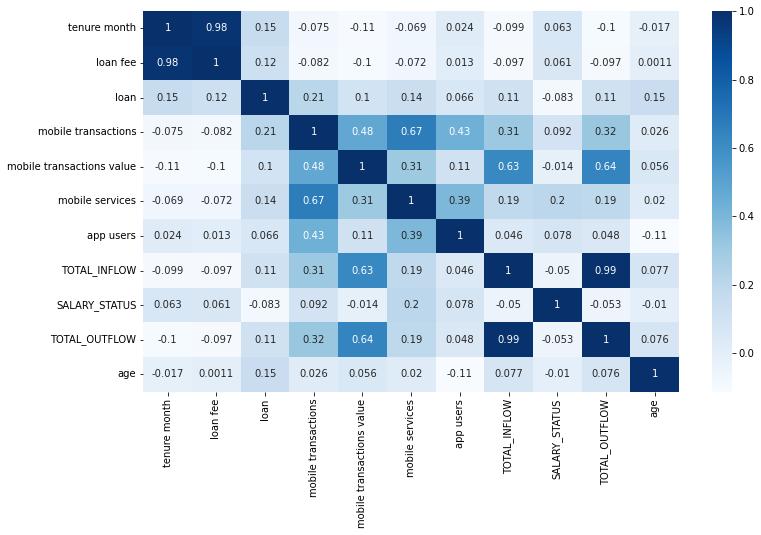

In [58]:
ax = plt.subplots(figsize=(12, 7))
corr = df.corr()
ax = sns.heatmap(corr, cmap="Blues", annot=True)
ax
plt.show()

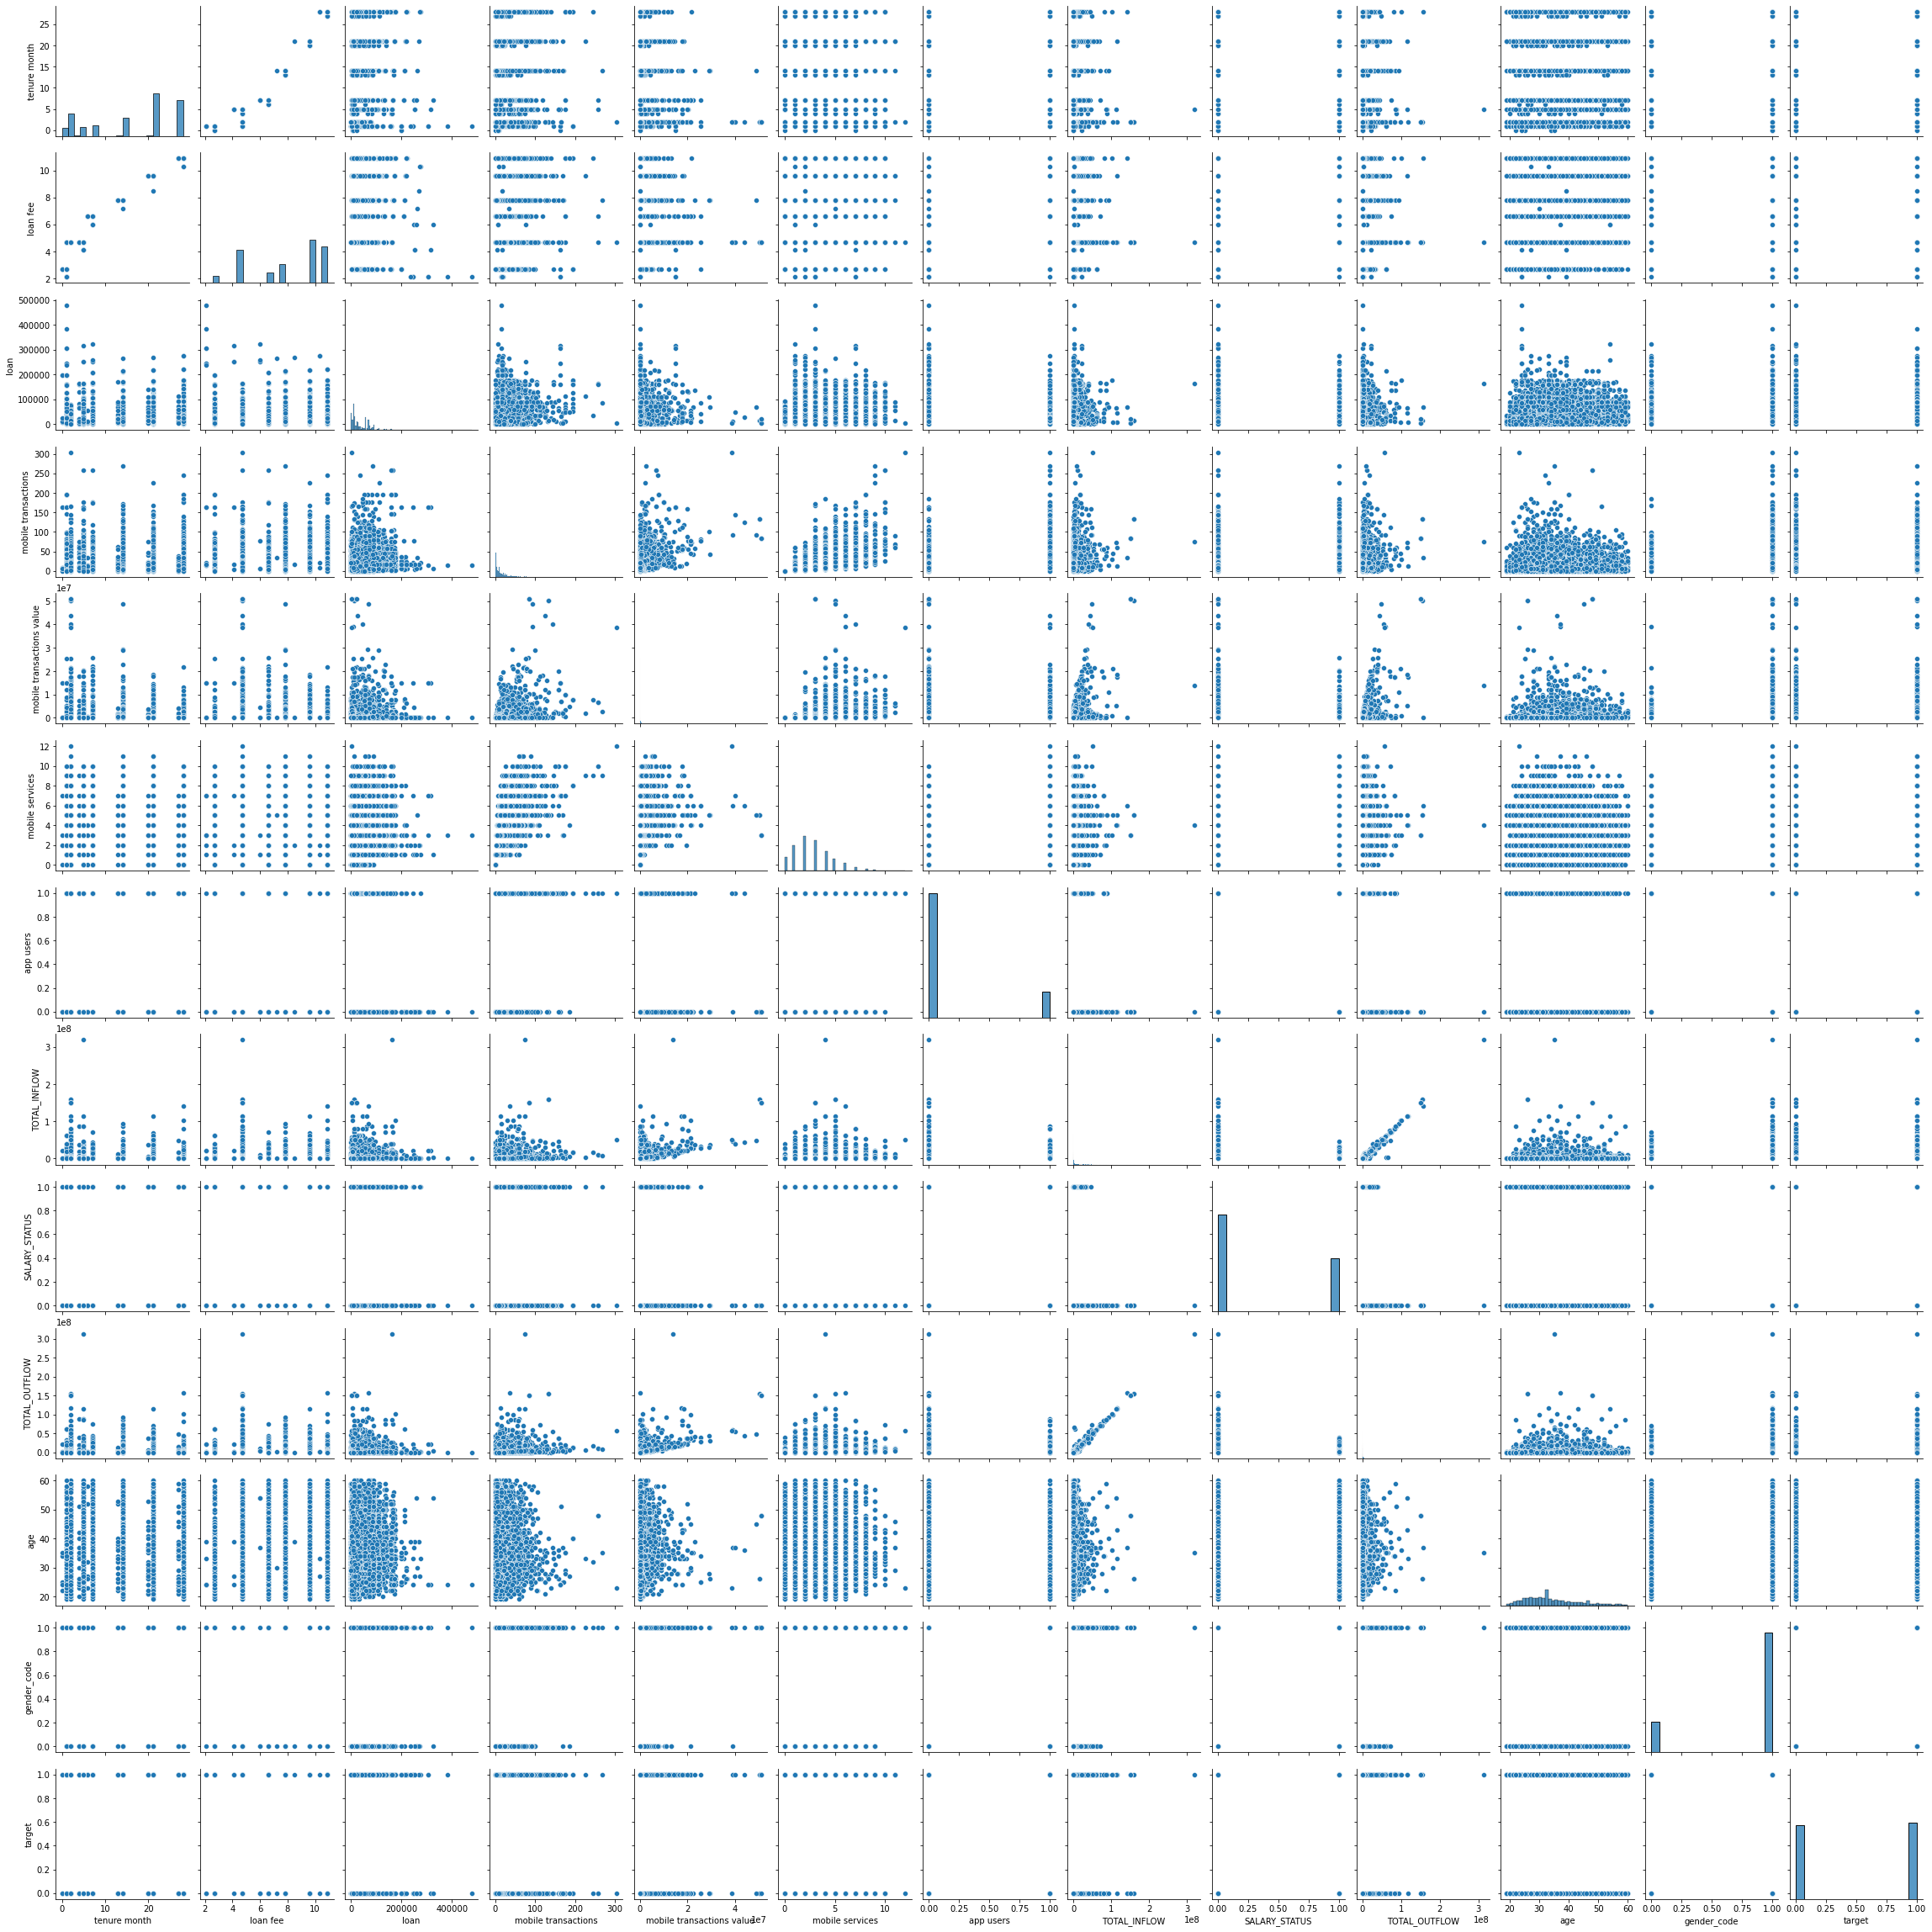

In [65]:
## Scatter plot
sns.pairplot(df)

In [61]:
df["gender"] = df["gender"].astype('category')
df["gender_code"] = df["gender"].cat.codes
ord_enc = OrdinalEncoder()
df["target"] = ord_enc.fit_transform(df[["is_default"]])

In [62]:
# Consider correlations only with the target variable
cor = df.corr()
target_v = cor['target']
target_v

tenure month                 0.011104
loan fee                     0.008324
loan                        -0.006183
mobile transactions         -0.000072
mobile transactions value   -0.009274
mobile services              0.003115
app users                    0.013936
TOTAL_INFLOW                 0.006706
SALARY_STATUS                0.008838
TOTAL_OUTFLOW                0.005841
age                         -0.022900
gender_code                 -0.010052
target                       1.000000
Name: target, dtype: float64

In [66]:
## data Scaling
scaler = StandardScaler()
num_cols = ['loan fee', 'TOTAL_INFLOW','loan', 'mobile transactions','mobile transactions value']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [96]:
df.columns

Index(['tenure month', 'loan fee', 'loan', 'mobile transactions',
       'mobile transactions value', 'mobile services', 'app users',
       'TOTAL_INFLOW', 'SALARY_STATUS', 'TOTAL_OUTFLOW', 'age', 'gender',
       'is_default', 'gender_code', 'target'],
      dtype='object')

In [184]:
X1 = df[['loan fee', 'loan', 'mobile transactions','mobile transactions value', 'mobile services', 'app users',
       'TOTAL_INFLOW', 'SALARY_STATUS', 'age', 'gender_code']]
X = df[['loan fee', 'TOTAL_INFLOW','loan', 'mobile transactions']]
Y = df['target']

In [185]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X , Y, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Show the Training and Testing Data
print('Shape of training predictors:', X_train.shape)
print('Shape of testing predictors:', X_test.shape)
print('Shape of training target:', y_train.shape)
print('Shape of testing target:', y_test.shape)

Shape of training predictors: (7624, 10)
Shape of testing predictors: (3268, 10)
Shape of training target: (7624,)
Shape of testing target: (3268,)


In [156]:
# Model Function
def evaluate_model(model, x_test, y_test):
        # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [157]:
# Building Decision Tree model 
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.5003059975520195
Precision: 0.5006067961165048
Recall: 0.5045871559633027
F1 Score: 0.5025890953396284
Cohens Kappa Score: 0.0006067547534740481
Area Under Curve: 0.4984458539563401
Confusion Matrix:
 [[810 823]
 [810 825]]


In [180]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=0,max_depth=80)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.5186658506731946
Precision: 0.5177752293577982
Recall: 0.5522935779816514
F1 Score: 0.5344776561112755
Cohens Kappa Score: 0.03729203856701846
Area Under Curve: 0.5075033099808798
Confusion Matrix:
 [[792 841]
 [732 903]]


In [159]:
# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.49938800489596086
Precision: 0.496
Recall: 0.037920489296636085
F1 Score: 0.07045454545454545
Cohens Kappa Score: -0.0006584402191305294
Area Under Curve: 0.4890318376152407
Confusion Matrix:
 [[1570   63]
 [1573   62]]


In [160]:
# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.5018359853121175
Precision: 0.501994301994302
Recall: 0.5388379204892967
F1 Score: 0.51976401179941
Cohens Kappa Score: 0.0036268158893714153
Area Under Curve: 0.49838255700938777
Confusion Matrix:
 [[759 874]
 [754 881]]


In [161]:
# Building SVM model 
supportvm = SVC(probability=True, kernel='linear')
supportvm.fit(X_train,y_train)

# Evaluate Model
svm_eval = evaluate_model(supportvm, X_test, y_test)

# Print result
print('Accuracy:', svm_eval['acc'])
print('Precision:', svm_eval['prec'])
print('Recall:', svm_eval['rec'])
print('F1 Score:', svm_eval['f1'])
print('Cohens Kappa Score:', svm_eval['kappa'])
print('Area Under Curve:', svm_eval['auc'])
print('Confusion Matrix:\n', svm_eval['cm'])

Accuracy: 0.5003059975520195
Precision: 0.5003059975520195
Recall: 1.0
F1 Score: 0.6669386090148888
Cohens Kappa Score: 0.0
Area Under Curve: 0.49130640778589896
Confusion Matrix:
 [[   0 1633]
 [   0 1635]]


In [189]:
# Building xgboost model 
xgb = XGBClassifier(n_estimators=25,  max_depth=80)
xgb.fit(X_train,y_train)

# Evaluate Model
xgb_eval = evaluate_model(xgb, X_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.5042839657282742
Precision: 0.5043277553375649
Recall: 0.5345565749235474
F1 Score: 0.5190023752969121
Cohens Kappa Score: 0.00853116852325797
Area Under Curve: 0.5065270762990387
Confusion Matrix:
 [[774 859]
 [761 874]]


In [187]:
# Building xgboost model 
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.5021419828641371
Precision: 0.5016528925619834
Recall: 0.7425076452599388
F1 Score: 0.5987669543773119
Cohens Kappa Score: 0.003990753679982917
Area Under Curve: 0.5006204224415767
Confusion Matrix:
 [[ 427 1206]
 [ 421 1214]]


[[ 0.03692163 -0.02556016 -0.01114955 -0.04025727  0.01863201  0.02899643
   0.05149496  0.0354438  -0.00629096 -0.07111629]]


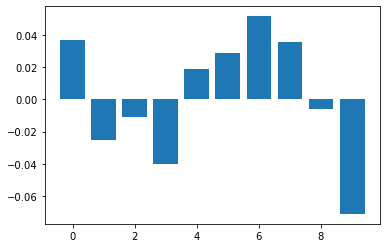

In [208]:
# Feature importance
feature_importance = lr.coef_
print(feature_importance)

plt.bar([x for x in range(len(feature_importance[0]))],feature_importance[0])
plt.show()